In [14]:
#to install the libraries and packages required 
#before this run, download pip in command line 
!pip install pandas
!pip install sklearn 
!pip install matplotlib
!pip install numpy
!pip install bioinfokit
!pip install combat
!pip install seaborn

In [15]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#read the RC data
raw_data = pd.read_csv('RC_original_second.csv', delimiter = "\t")

#obtain the dataframe 
long_df_na = raw_data[sorted(raw_data.columns)]
fat_df_na = long_df_na.T 

#drop genes with any missing values 
fat_df = fat_df_na.dropna(axis=1,how='any')
long_df = fat_df.T

## Perform Batch Correction

In [16]:
from combat.pycombat import pycombat
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]

#perform log transformation
long_df_log = np.log2(long_df)

#perform batch correction
global_bc = pycombat(long_df_log,batch)
global_bc

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,C1_1,C1_2,C2_1,C2_2,C3_1,C3_2,C4_1,C4_2,C5_1,C5_2,...,N2_1,N2_2,N3_1,N3_2,N4_1,N4_2,N5_1,N5_2,N6_1,N6_2
Q9UL46,16.609255,16.773328,17.140739,17.214806,17.105532,16.788925,16.802570,16.447754,16.671906,16.447754,...,15.858340,15.862651,15.039573,15.216102,15.313088,14.842518,15.322973,14.929816,15.401948,15.153448
P04040,17.220270,17.287293,14.685788,14.860959,17.770718,17.779927,17.481647,17.464013,16.957679,16.959646,...,17.884408,17.843518,17.992674,18.039959,18.174880,18.173382,17.998513,17.992519,17.663941,17.565365
Q9H0W9,16.273485,16.141875,15.798692,15.403485,17.489451,17.489861,18.029804,17.848273,17.834050,17.917787,...,18.605178,18.476894,18.501298,18.452126,18.691620,18.785905,18.874054,18.997878,18.723558,18.712663
P31948,16.354522,16.490390,17.077879,17.164822,16.760531,16.728662,16.909293,16.721992,16.995807,17.024979,...,16.359348,16.375979,16.216293,15.984150,16.019479,15.981220,16.326563,16.513981,16.058250,15.951783
Q99714,16.835672,16.282623,16.252515,16.601613,16.522258,16.432051,16.870710,16.708176,15.406333,16.521200,...,17.476125,17.446945,17.762942,17.835569,17.632936,17.728372,17.554396,17.624168,17.588046,17.600147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P29966,15.519015,15.647282,15.363371,15.372167,15.519015,15.458495,14.719888,14.810057,15.477359,15.355623,...,13.098514,13.765808,13.500779,13.587524,12.825855,13.699125,13.417153,13.699125,13.345549,13.747316
O75874,16.747097,16.703193,17.235103,17.220125,16.737783,16.608309,16.493092,16.398428,16.690019,17.266773,...,17.731882,17.651745,17.776178,17.769818,17.979817,18.060189,17.806224,17.812668,17.456218,17.426607
Q9NSD9,15.617852,15.643578,15.628545,15.676058,15.439600,15.112261,15.760413,15.740020,15.454436,15.528035,...,14.997344,15.108523,15.095109,15.023340,14.893275,15.076503,14.795403,15.065403,14.792377,14.854474
P11182,17.567015,17.889816,19.127815,19.118302,18.192564,18.191417,17.819111,18.159949,17.922115,17.696593,...,18.264408,18.213386,17.777416,17.454821,16.735685,17.575073,17.798894,17.860200,17.034278,17.702327


## PCA on the non-batch corrected data 

Proportion of Variance Explained :  [4.50924731e-01 1.40681487e-01 7.36174139e-02 5.67442420e-02
 4.62723161e-02 3.25641394e-02 2.90739772e-02 2.41156839e-02
 2.31035168e-02 1.77702600e-02 1.74482817e-02 1.40564303e-02
 9.50814675e-03 8.51232026e-03 8.05640323e-03 7.93595025e-03
 6.55097038e-03 6.33732146e-03 6.26049853e-03 5.79219480e-03
 5.33485397e-03 4.87865806e-03 4.46020265e-03 3.67196030e-33]


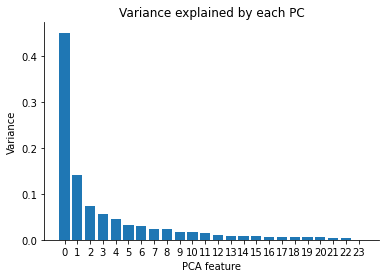

<function matplotlib.pyplot.show(close=None, block=None)>

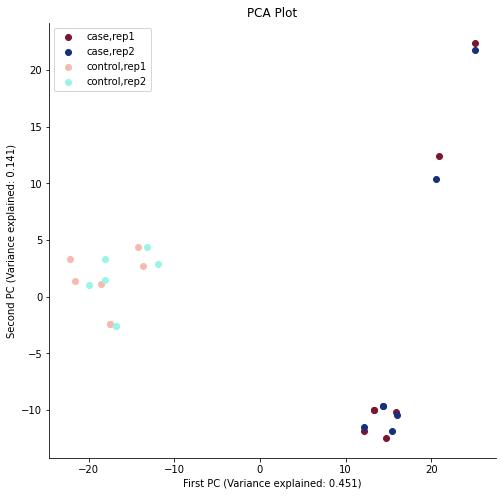

In [17]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(long_df_log.T)
scaled_long_df_log = scaler.transform(long_df_log.T)

pca = PCA(n_components=24)
pca.fit(scaled_long_df_log)
scaled_long_df_log

#run PCA 
x_pca = pca.transform(scaled_long_df_log)
scaled_long_df_log.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.451)")
plt.ylabel("Second PC (Variance explained: 0.141)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


Text(0, 0.5, 'Variance')

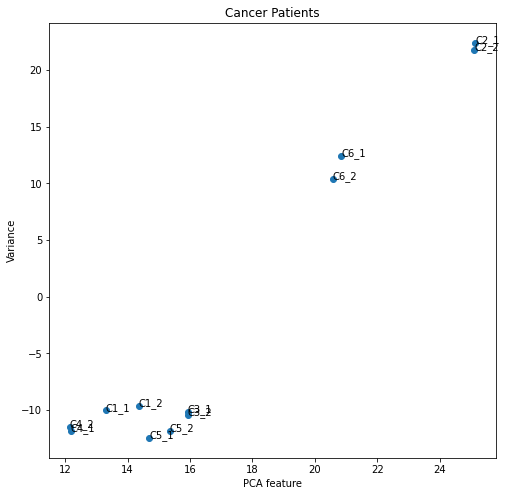

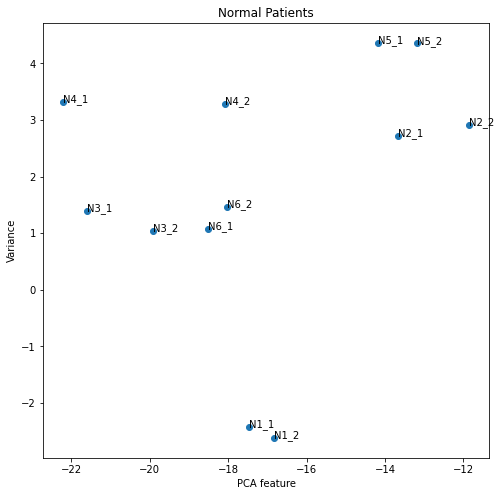

In [18]:
#proportion of variance explained after MTC 
#cancer patients
cancer_n = fat_df.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_n = fat_df.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## PCA plot on the batch corrected data

Proportion of Variance Explained :  [4.52873767e-01 1.41267870e-01 7.39796463e-02 5.70663795e-02
 4.65928657e-02 3.25980785e-02 2.91715244e-02 2.39944340e-02
 2.32949212e-02 1.76115349e-02 1.57996479e-02 1.39455494e-02
 8.73231480e-03 8.32801082e-03 7.99495092e-03 7.46342648e-03
 6.51942932e-03 6.31964626e-03 6.17367486e-03 5.69222791e-03
 5.29462056e-03 4.83844585e-03 4.44703260e-03 3.08744456e-33]


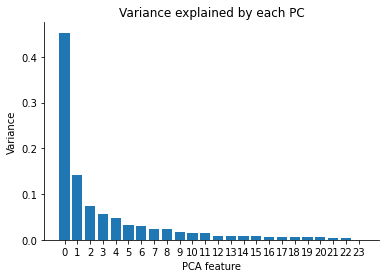

<function matplotlib.pyplot.show(close=None, block=None)>

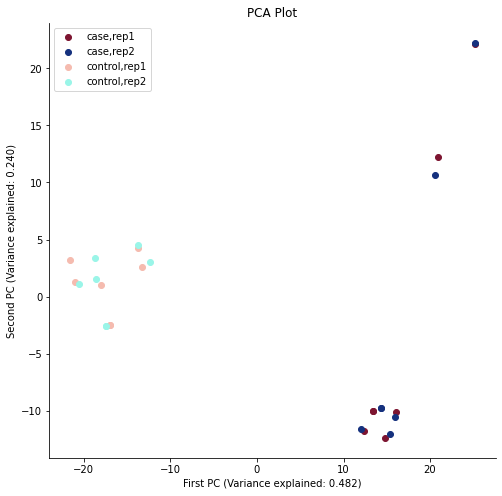

In [19]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(global_bc.T)
scaled_global_bc = scaler.transform(global_bc.T)

pca = PCA(n_components=24)
pca.fit(scaled_global_bc)
scaled_global_bc

#run PCA 
x_pca = pca.transform(scaled_global_bc)
scaled_global_bc.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.482)")
plt.ylabel("Second PC (Variance explained: 0.240)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


Text(0, 0.5, 'Variance')

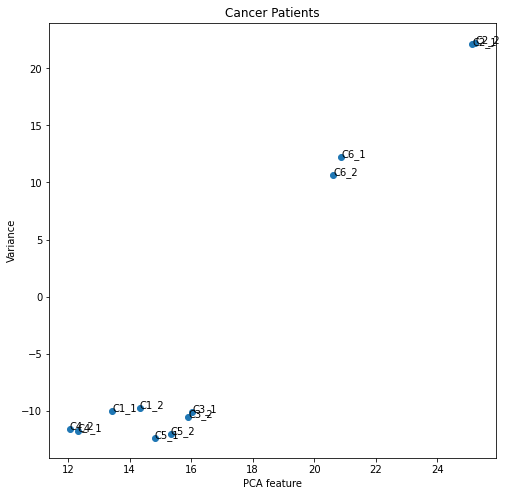

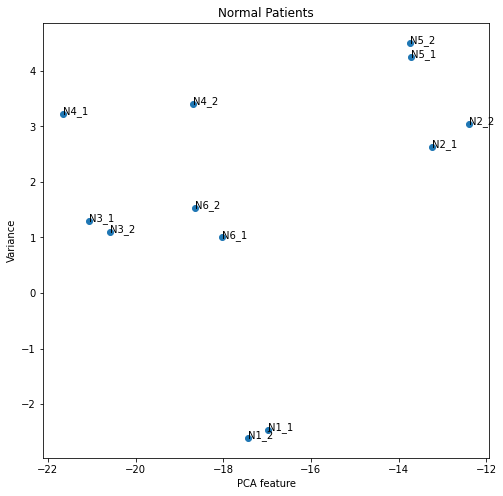

In [20]:
#proportion of variance explained after MTC 
#cancer patients
cancer_n = fat_df.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_n = fat_df.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## PCA on class specific batch corrected data

In [21]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = long_df_log.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
df_control = long_df_log.iloc[:, [12,13,14,15,16,17,18,19,20,21,22,23]]

#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer_lc = np.log2(df_cancer)
#df_control = df_control.set_index("Unnamed: 0")
df_control_lc = np.log2(df_control) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_bc = pycombat(df_cancer_lc,batch)
df_control_bc = pycombat(df_control_lc,batch)
df_control_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_cs = pd.concat([df_cancer_bc, df_control_bc], axis = 1)
df_cs

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,C1_1,C1_2,C2_1,C2_2,C3_1,C3_2,C4_1,C4_2,C5_1,C5_2,...,N2_1,N2_2,N3_1,N3_2,N4_1,N4_2,N5_1,N5_2,N6_1,N6_2
Q9UL46,4.053155,4.068691,4.099108,4.105468,4.096109,4.070006,4.070039,4.040949,4.058649,4.040949,...,3.986881,3.987140,3.907476,3.929608,3.934478,3.895253,3.935445,3.903357,3.943146,3.923905
P04040,4.106017,4.111671,3.875950,3.893781,4.151391,4.152236,4.127745,4.126351,4.083847,4.084060,...,4.159890,4.158126,4.168971,4.173272,4.184127,4.183468,4.169459,4.169629,4.141225,4.136397
Q9H0W9,4.022953,4.014338,3.979818,3.947497,4.127876,4.128897,4.172160,4.157884,4.156274,4.163439,...,4.216591,4.209159,4.207968,4.207332,4.223729,4.231753,4.238686,4.247039,4.226359,4.226431
P31948,4.032238,4.043043,4.093965,4.101619,4.067214,4.064007,4.079816,4.063424,4.087095,4.089665,...,4.032465,4.032940,4.018790,4.000247,3.999775,4.000000,4.029342,4.044269,4.003540,3.997511
Q99714,4.071854,4.024991,4.022620,4.054165,4.045617,4.038725,4.074756,4.063791,3.947823,4.046862,...,4.127466,4.124937,4.152310,4.154830,4.141101,4.146648,4.134287,4.138648,4.137210,4.136797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P29966,3.955957,3.967791,3.941270,3.942463,3.955957,3.950457,3.878870,3.889323,3.952041,3.940925,...,3.717234,3.779637,3.754290,3.761860,3.691437,3.773014,3.746682,3.773014,3.740128,3.777803
O75874,4.065228,4.062803,4.107884,4.105365,4.064402,4.054850,4.042525,4.037097,4.060157,4.109144,...,4.148203,4.142055,4.151961,4.151287,4.169114,4.173735,4.154504,4.154622,4.124602,4.124282
Q9NSD9,3.965280,3.967269,3.966287,3.970195,3.948386,3.918537,3.978650,3.975941,3.949799,3.956810,...,3.907100,3.916418,3.916564,3.908528,3.896957,3.913457,3.887351,3.912429,3.887053,3.892757
P11182,4.134687,4.160814,4.259209,4.255205,4.185928,4.184549,4.155563,4.182090,4.164004,4.145406,...,4.190615,4.186274,4.153212,4.122394,4.069477,4.132695,4.154884,4.156854,4.094023,4.143524


Proportion of Variance Explained :  [4.57189295e-01 1.40970294e-01 7.37346570e-02 5.69970913e-02
 4.70873974e-02 3.25393656e-02 2.92119924e-02 2.41537422e-02
 2.34756400e-02 1.78737567e-02 1.55340231e-02 1.37959198e-02
 8.31419556e-03 8.20158058e-03 7.11371169e-03 6.59265019e-03
 6.39425170e-03 6.24348666e-03 5.60126227e-03 5.24248513e-03
 4.88467957e-03 4.68860950e-03 4.15991271e-03 4.36993216e-33]


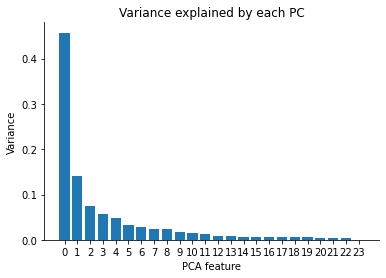

<function matplotlib.pyplot.show(close=None, block=None)>

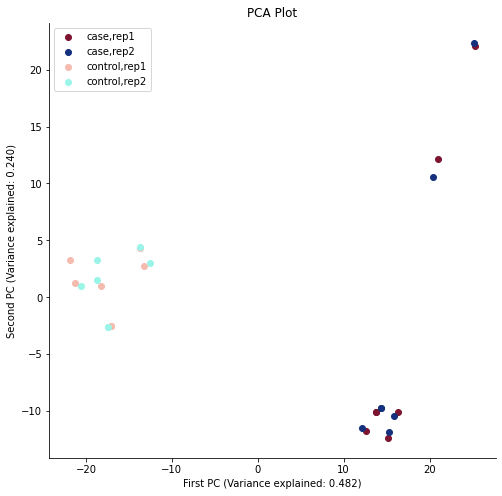

In [22]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_cs.T)
scaled_df_cs = scaler.transform(df_cs.T)

pca = PCA(n_components=24)
pca.fit(scaled_df_cs)
scaled_df_cs

#run PCA 
x_pca = pca.transform(scaled_df_cs)
scaled_df_cs.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.482)")
plt.ylabel("Second PC (Variance explained: 0.240)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


In [23]:
df_cs

,C1_1,C1_2,C2_1,C2_2,C3_1,C3_2,C4_1,C4_2,C5_1,C5_2,...,N2_1,N2_2,N3_1,N3_2,N4_1,N4_2,N5_1,N5_2,N6_1,N6_2
Q9UL46,4.053155,4.068691,4.099108,4.105468,4.096109,4.070006,4.070039,4.040949,4.058649,4.040949,...,3.986881,3.987140,3.907476,3.929608,3.934478,3.895253,3.935445,3.903357,3.943146,3.923905
P04040,4.106017,4.111671,3.875950,3.893781,4.151391,4.152236,4.127745,4.126351,4.083847,4.084060,...,4.159890,4.158126,4.168971,4.173272,4.184127,4.183468,4.169459,4.169629,4.141225,4.136397
Q9H0W9,4.022953,4.014338,3.979818,3.947497,4.127876,4.128897,4.172160,4.157884,4.156274,4.163439,...,4.216591,4.209159,4.207968,4.207332,4.223729,4.231753,4.238686,4.247039,4.226359,4.226431
P31948,4.032238,4.043043,4.093965,4.101619,4.067214,4.064007,4.079816,4.063424,4.087095,4.089665,...,4.032465,4.032940,4.018790,4.000247,3.999775,4.000000,4.029342,4.044269,4.003540,3.997511
Q99714,4.071854,4.024991,4.022620,4.054165,4.045617,4.038725,4.074756,4.063791,3.947823,4.046862,...,4.127466,4.124937,4.152310,4.154830,4.141101,4.146648,4.134287,4.138648,4.137210,4.136797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P29966,3.955957,3.967791,3.941270,3.942463,3.955957,3.950457,3.878870,3.889323,3.952041,3.940925,...,3.717234,3.779637,3.754290,3.761860,3.691437,3.773014,3.746682,3.773014,3.740128,3.777803
O75874,4.065228,4.062803,4.107884,4.105365,4.064402,4.054850,4.042525,4.037097,4.060157,4.109144,...,4.148203,4.142055,4.151961,4.151287,4.169114,4.173735,4.154504,4.154622,4.124602,4.124282
Q9NSD9,3.965280,3.967269,3.966287,3.970195,3.948386,3.918537,3.978650,3.975941,3.949799,3.956810,...,3.907100,3.916418,3.916564,3.908528,3.896957,3.913457,3.887351,3.912429,3.887053,3.892757
P11182,4.134687,4.160814,4.259209,4.255205,4.185928,4.184549,4.155563,4.182090,4.164004,4.145406,...,4.190615,4.186274,4.153212,4.122394,4.069477,4.132695,4.154884,4.156854,4.094023,4.143524


In [37]:
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header
genes = list(featuretable.columns)

In [38]:
genes2 = list(df_cs.T.columns)

In [40]:
len(set(genes).intersection(genes2))

684

In [48]:
unique_RC_genes_in_mine = ((set(genes) - set(genes2)))

In [56]:
df[list(unique_RC_genes_in_mine)]

KeyError: "None of [Index(['O60869', 'Q9NPA8', 'O76094', 'Q9UHQ9', 'Q16643', 'Q8TEX9', 'Q8N5G0',\n       'P35908', 'Q9UPQ9', 'Q9UI08',\n       ...\n       'O96019', 'P05230', 'O43795', 'O14828', 'Q9UKU7', 'P50053', 'P80217',\n       'O60841', 'Q9BV38', 'Q6GMR7'],\n      dtype='object', length=2439)] are in the [columns]"

In [59]:
from combat.pycombat import pycombat
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)
df_batchcorrected
df_batchcorrected_T = df_batchcorrected.T
df_batchcorrected_T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,15.261891,15.120885,18.038296,12.017492,16.528783,16.445190,16.561621,16.411772,15.799947,9.758744,...,18.405452,16.562000,18.628720,17.308034,15.123830,17.612549,15.719732,16.007835,14.220463,15.628695
cancer_cc_patient1_rep2,15.497953,15.529820,18.150705,12.618507,16.929017,16.714625,16.801537,16.583596,16.366595,10.463202,...,18.688335,17.017259,19.083291,17.324651,15.663390,17.838132,16.379401,16.546066,13.282330,15.843931
cancer_cc_patient2_rep1,15.385620,16.770919,16.933262,12.765636,17.294768,16.959425,16.728772,16.168529,16.424491,11.670427,...,19.347907,15.743608,19.206320,15.860449,15.143689,18.505624,16.491129,17.533600,13.558670,16.465482
cancer_cc_patient2_rep2,15.573816,17.083958,17.372370,13.105386,17.396542,16.737107,17.008293,16.410451,16.822171,12.025418,...,19.264426,16.211847,19.607998,16.103718,15.678620,18.689095,16.846228,17.553174,13.766450,16.652416
cancer_cc_patient3_rep1,14.576160,14.896713,17.147580,12.353880,16.497590,16.233003,16.372194,15.588221,16.772132,10.355943,...,19.098558,16.310533,19.978231,15.326957,14.766795,17.997399,15.965843,16.121521,12.584503,16.010178
cancer_cc_patient3_rep2,14.782542,15.121457,17.079209,12.117356,16.473731,16.255145,16.333088,15.649463,16.350529,10.926825,...,18.794364,17.100450,19.822723,15.257468,14.907591,17.995047,16.007752,15.986019,12.556466,15.711479
cancer_cc_patient6_rep1,15.038394,15.524121,17.462149,11.702529,16.757317,16.691000,17.160792,15.765475,16.444417,11.052388,...,18.974288,16.318496,20.254488,15.489748,14.868436,18.311539,15.841342,16.530455,12.874999,16.300697
cancer_cc_patient6_rep2,14.990264,15.240991,17.454246,12.066772,16.485945,16.538912,16.580518,15.815436,16.095301,11.262754,...,18.701159,16.415987,20.113555,15.521877,15.007682,18.094609,16.080465,16.446143,12.854917,16.049570
cancer_cc_patient7_rep1,15.144517,15.799568,17.308101,12.290668,16.377236,16.360390,16.461089,15.487084,16.477755,11.028674,...,18.623409,15.757512,19.792686,15.604300,14.790046,18.057919,16.358697,16.150432,13.066281,16.324340
cancer_cc_patient7_rep2,14.814546,15.640455,17.172902,12.232309,16.289483,15.962975,15.998559,15.650491,16.217439,11.487273,...,18.617412,15.917061,19.708468,15.590775,14.971815,17.907636,15.908900,16.171063,12.728632,16.019315


Proportion of Variance Explained :  [4.03407481e-01 2.37865290e-01 8.99775828e-02 4.31827083e-02
 4.17213534e-02 3.51971825e-02 2.40404649e-02 2.27734575e-02
 1.96474826e-02 1.52090681e-02 1.13986380e-02 1.08386853e-02
 8.06306818e-03 5.71060953e-03 5.60947871e-03 4.62315046e-03
 3.63736979e-03 3.55317167e-03 3.30491939e-03 3.07132840e-03
 2.82981865e-03 2.46077699e-03 1.87691404e-03 3.48734998e-33]


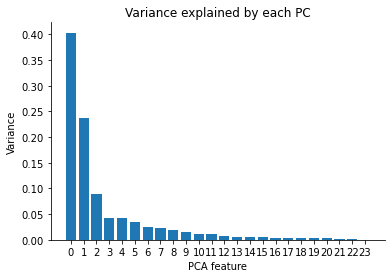

<function matplotlib.pyplot.show(close=None, block=None)>

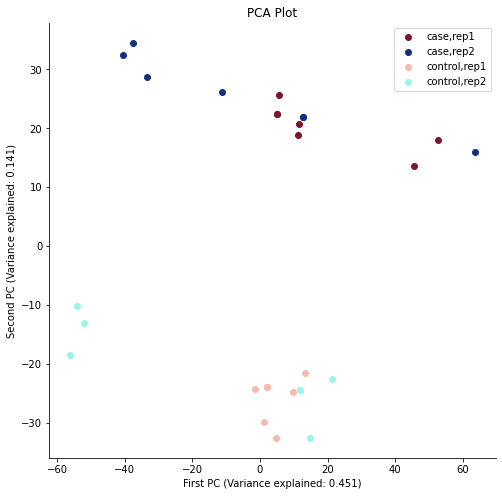

In [62]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
df_unique_genes_in_mine = df2_logtransformed.T[unique_RC_genes_in_mine]
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_unique_genes_in_mine)
scaled_df_unique_genes_in_mine = scaler.transform(df_unique_genes_in_mine)

pca = PCA(n_components=24)
pca.fit(scaled_df_unique_genes_in_mine)
scaled_df_unique_genes_in_mine

#run PCA 
x_pca = pca.transform(scaled_df_unique_genes_in_mine)
scaled_df_unique_genes_in_mine.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC (Variance explained: 0.451)")
plt.ylabel("Second PC (Variance explained: 0.141)")

xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

# cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
# non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# # batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# # batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
# #cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show


In [47]:
long_df_log[unique_RC_genes_in_mine]

KeyError: 2439

Text(0, 0.5, 'Variance')

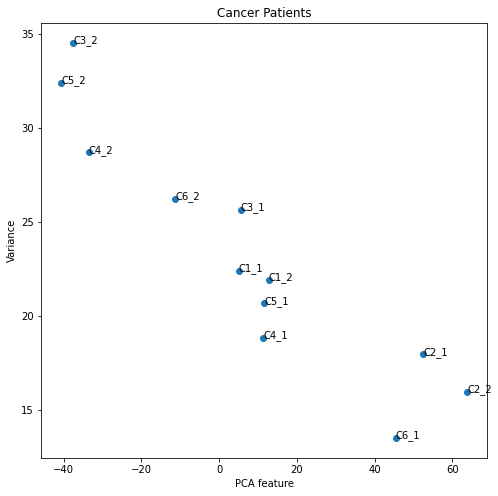

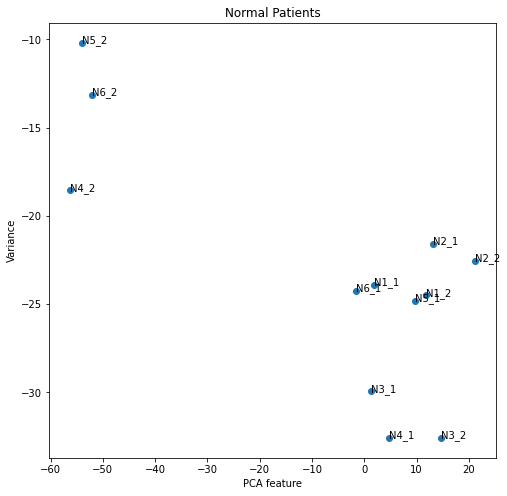

In [63]:
#proportion of variance explained after MTC 
#cancer patients
cancer_n = fat_df.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
control_n = fat_df.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(control_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')